In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [86]:
train = pd.read_csv(r"C:\Users\Ravi\Downloads\Problem Statement (6)\train.csv")

In [87]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [88]:
x =train.drop(["subscribed"],axis = 1)
y= train["subscribed"]

In [89]:
train_x,test_x,train_y,test_y= train_test_split(x,y,random_state = 40,stratify=y)

In [90]:
train_x.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [91]:
train_x.shape , test_x.shape

((23735, 17), (7912, 17))

In [92]:
train_x.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

# Univariate Analysis of Variables

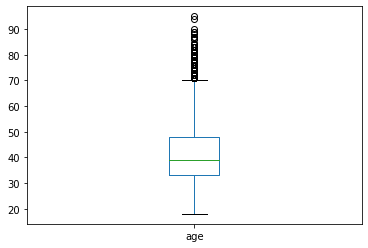

In [93]:
train_x["age"].plot.box()


In [94]:
train_x['age'].mean()

40.902970297029704

In [95]:
train_x['age'].median()

39.0

In [96]:
train_x['age'].mode()

0    32
dtype: int64

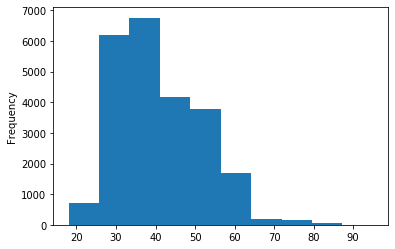

In [97]:
train_x["age"].plot.hist()

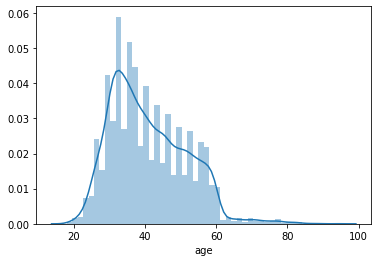

In [98]:
sns.distplot(train_x["age"],kde = True, hist= True)

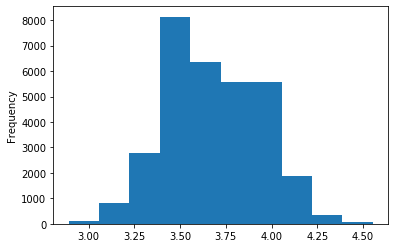

In [99]:
np.log(train["age"]).plot.hist()

In [100]:
train_x.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,23735.000000,23735.000000,23735.000000,23735.000000,23735.000000,23735.000000,23735.000000,23735.000000
mean,22498.208637,40.902970,1384.618622,15.854477,258.238888,2.773583,40.020350,0.572993
std,13046.449188,10.546597,3104.179494,8.326750,257.681188,3.120371,99.933798,1.864448
min,5.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11205.500000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22484.000000,39.000000,451.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33740.000000,48.000000,1433.500000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,55.000000,871.000000,41.000000


In [101]:
train_x.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

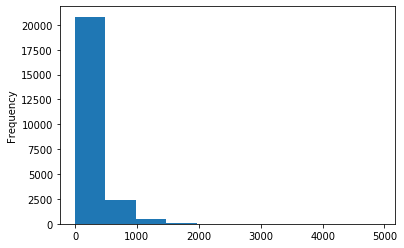

In [102]:
train_x["duration"].plot.hist()

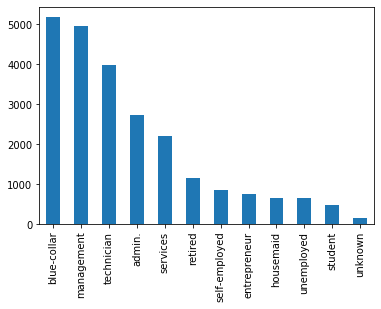

In [103]:
train_x['job'].value_counts().plot.bar()

In [104]:
train_x["job"].value_counts()

blue-collar      5182
management       4948
technician       3980
admin.           2734
services         2197
retired          1148
self-employed     850
entrepreneur      744
housemaid         659
unemployed        658
student           480
unknown           155
Name: job, dtype: int64

## Bivariate Analysis of Varibales

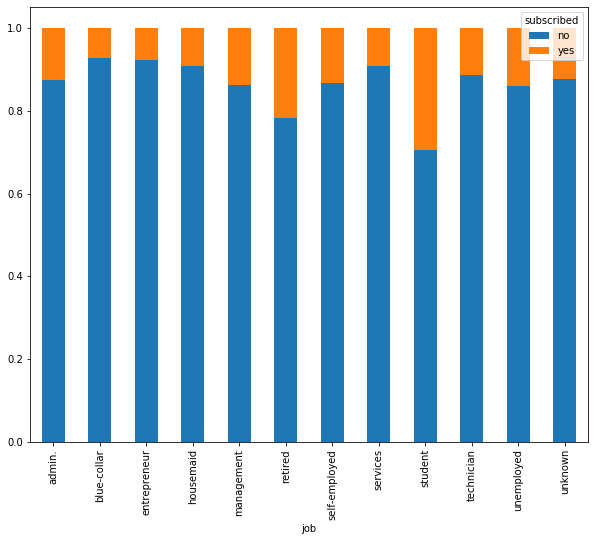

In [105]:
job_sub=pd.crosstab(train_x["job"],train['subscribed'])
job_sub.div(job_sub.sum(1).astype(float),axis=0).plot.bar(figsize = (10,8),stacked= True)

In [106]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(train_x["job"], train["subscribed"]))

(418.8735722397065,
 5.998297842815366e-83,
 11,
 array([[2413.0847272 ,  320.9152728 ],
        [4573.73996208,  608.26003792],
        [ 656.66972825,   87.33027175],
        [ 581.64697704,   77.35302296],
        [4367.2067411 ,  580.7932589 ],
        [1013.24845165,  134.75154835],
        [ 750.22751211,   99.77248789],
        [1939.11746366,  257.88253634],
        [ 423.65788919,   56.34211081],
        [3512.82999789,  467.17000211],
        [ 580.76435644,   77.23564356],
        [ 136.80619339,   18.19380661]]))

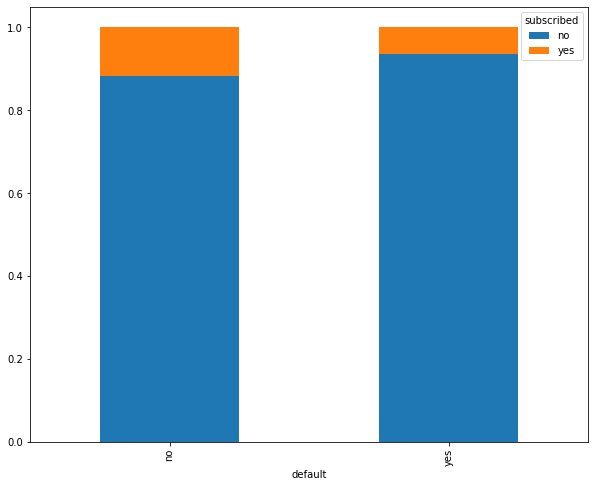

In [107]:
def_sub = pd.crosstab(train_x["default"],train["subscribed"])
def_sub.div(def_sub.sum(1).astype(float), axis = 0).plot.bar(stacked= True, figsize=(10,8))

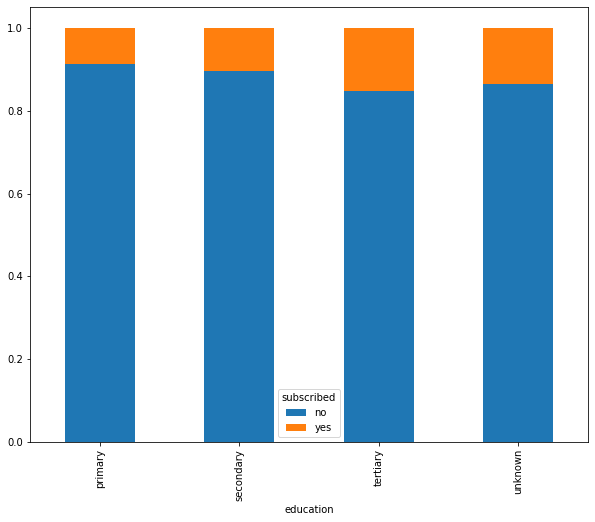

In [108]:
ed_sub= pd.crosstab(train_x["education"], train["subscribed"])
ed_sub.div(ed_sub.sum(1).astype(float),axis=0).plot.bar(stacked= True, figsize = (10,8))

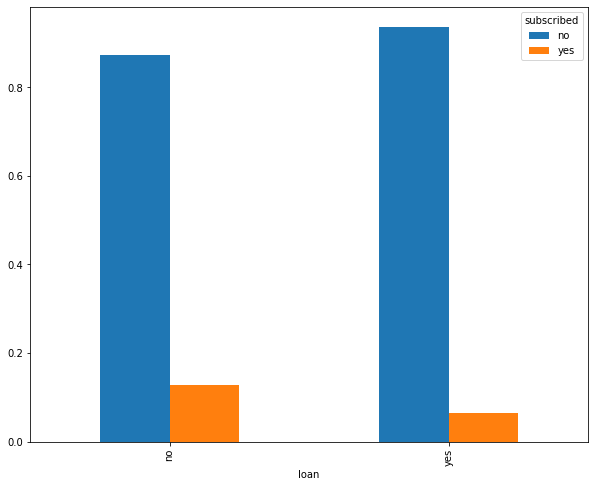

In [109]:
loan_sub=pd.crosstab(train_x["loan"],train["subscribed"])
loan_sub.div(loan_sub.sum(1).astype(float),axis=0).plot.bar(figsize=(10,8))

In [110]:
#to check how are various numerical data are related
train.replace("no",0,inplace = True)
train.replace("yes",1,inplace= True)

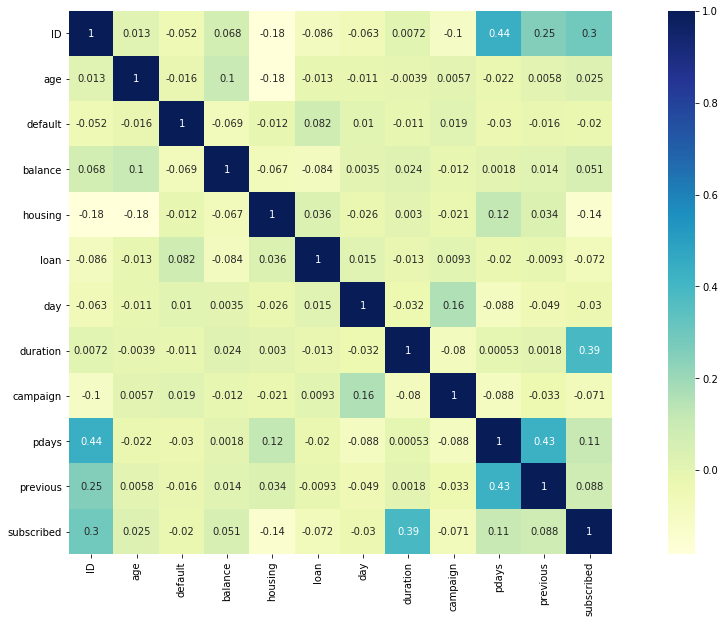

In [111]:
corr = train.corr()
mask=np
fig,ax=plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr,square=True, annot = True, cmap="YlGnBu")


In [112]:
target = train['subscribed']
train = train.drop("subscribed",axis=1)

In [113]:
train= pd.get_dummies(train)

In [138]:
x_train, x_test , y_train, y_test  = train_test_split(train, target, test_size = 0.3, random_state=12, stratify = target)

# Logistic Regression

In [139]:
#building the model
from sklearn.linear_model import LogisticRegression

In [140]:
lreg = LogisticRegression()

In [141]:
lreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [142]:
pred = lreg.predict(x_test)

In [143]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.892259083728278

### Decision Tree

In [202]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 4, random_state=0, min_samples_leaf = 1)

In [203]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [204]:
predict = clf.predict(x_test)

In [205]:
accuracy_score(y_test,predict)

0.9091100579252238

## The accuracy rate of Decision Tree was better than Logistic Regression